# Diabetes Prediction - EDA & Model Training
This notebook will handle:
- Loading and Cleaning the dataset
- Exploratory Data Analysis
- Missing Value imputation
- Visualizations (histograms, heatmaps, boxplots)
- Model Selection and Training (Logistic Regression)

# IMPORTING THE IMPORTANT LIBRARIES
- pandas: to use and organise the structured data 
- numpy: for numerical computation in Python
- seaborn: for creating attractive statistical graphs
- scikit-learn: provides tools for ML tasks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### LOADING DATA

In [2]:
df = pd.read_csv('\diabetes_predictor\data\diabetes_prediction.csv')
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df = df.drop(['smoking_history', 'gender'], axis = 1)

In [4]:
# Information Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 5.3 MB


In [5]:
#Describing the Dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### CLEANING DATA
- fill the missing values with NaN and fill with median

In [6]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# EXPLORATION DATA ANALYSIS

### HEATMAP - FOR CORRELATION
- Features with higher corr with 'Outcome' more important for prediction


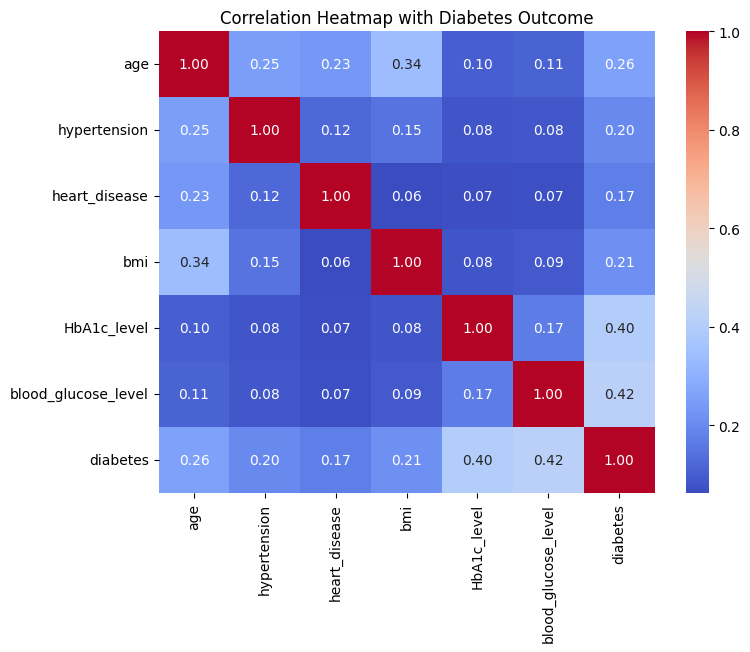

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap with Diabetes Outcome")
plt.show()

### HISTOGRAM
- Check for separation between curves
- Overlapping = less predictive
- Distinct Peaks for Outcome=1 indicates strong predictive features

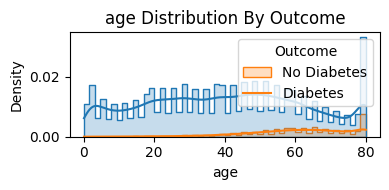

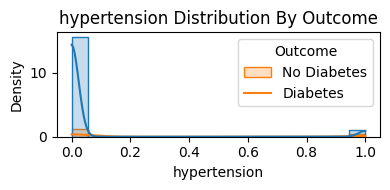

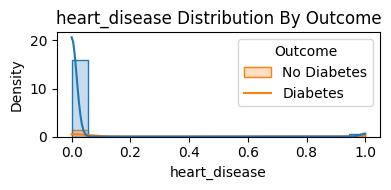

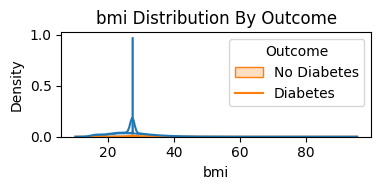

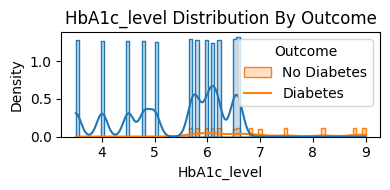

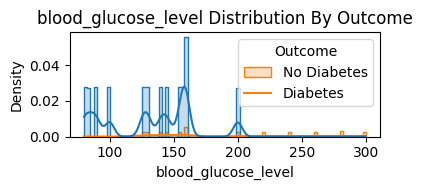

In [8]:
for col in df.columns[:-1]:
    plt.figure(figsize=(4,2))
    sns.histplot(data=df, x = col, kde = True,hue='diabetes', palette=['#1f77b4', '#ff7f0e'], element='step', stat='density')
    plt.title(f"{col} Distribution By Outcome")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Outcome", labels =["No Diabetes", "Diabetes"])
    plt.tight_layout()
    plt.show()

### SCATTER PLOT
- To see linear Relationship
- What to Look For:
1. Separation between classes  
Good Sign: If red and blue dots (classes) form clusters or are mostly on different sides.  
Bad Sign: If they're heavily mixed — hard to draw a clear boundary.

2. Linear Separability: Can you imagine a straight line dividing the two groups?  
If yes → Linear models like Logistic Regression or Linear SVM may work.  
If no → Consider non-linear models like RBF SVM, Random Forests, or Neural Nets.  

3. Outliers  
Few points far from the rest? These may affect model performance and scaling.  

4. Clusters  
Sometimes, one class is more tightly grouped — this may indicate strong predictive power of that feature.  

5. Feature Scale  
Check if one axis (e.g., Glucose) ranges from 0 to 200, while another is 0 to 10 — this may require scaling for fair model input.  

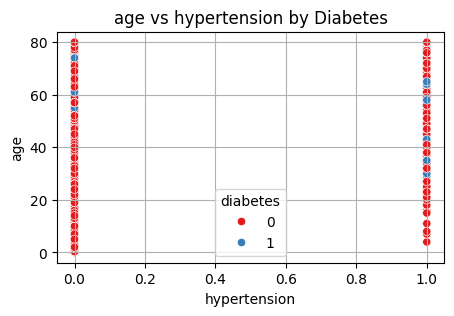

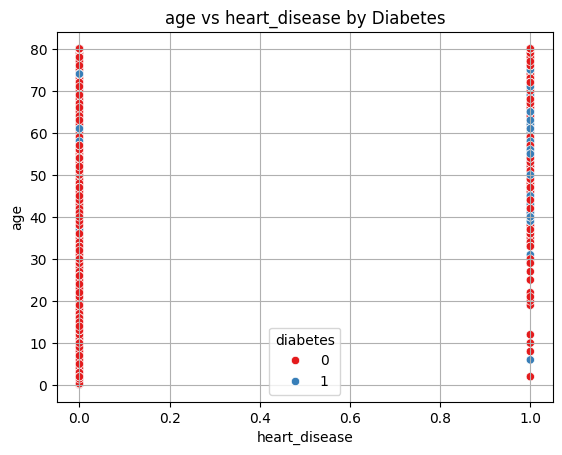

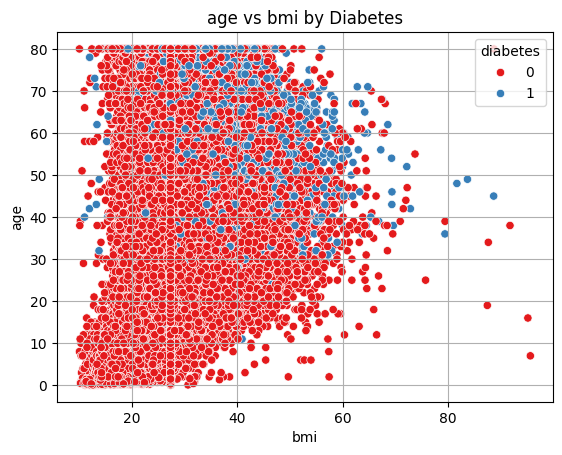

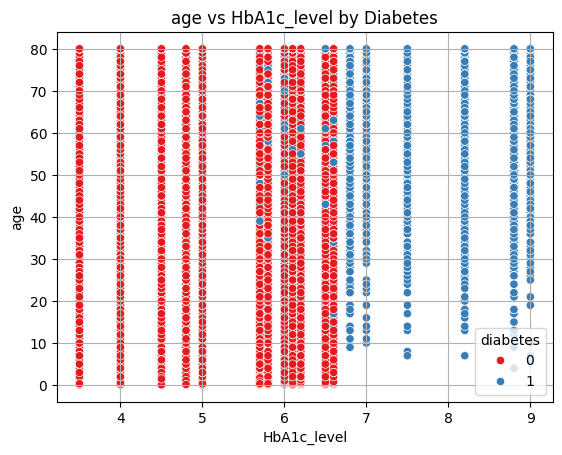

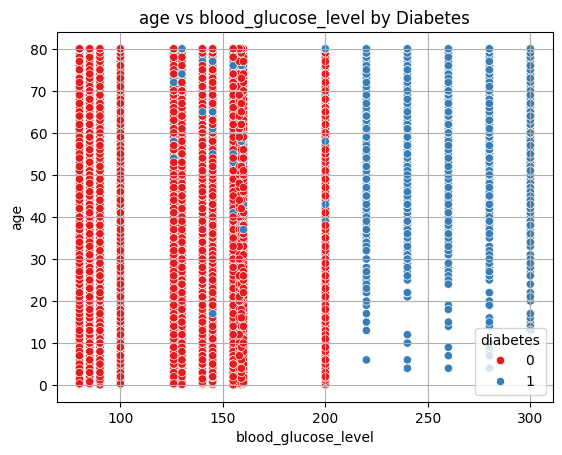

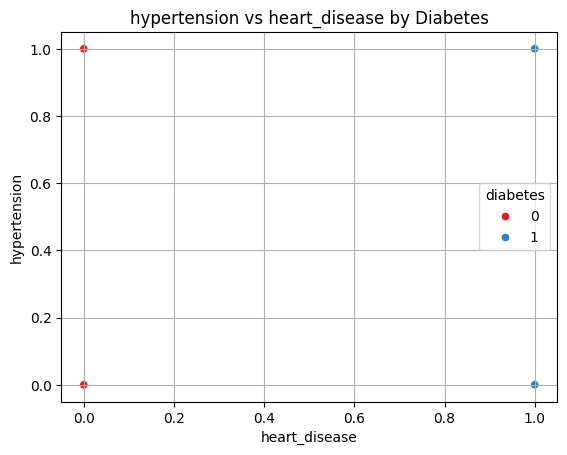

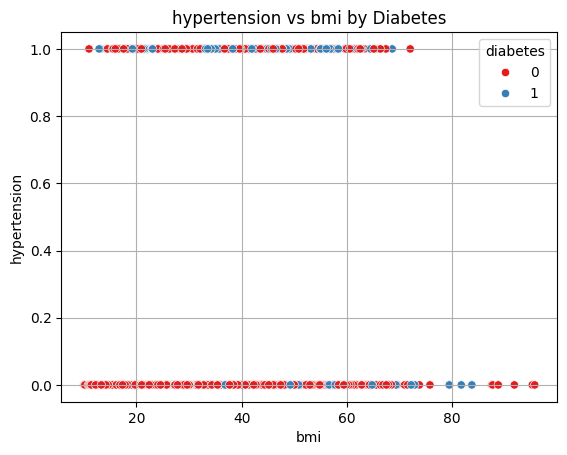

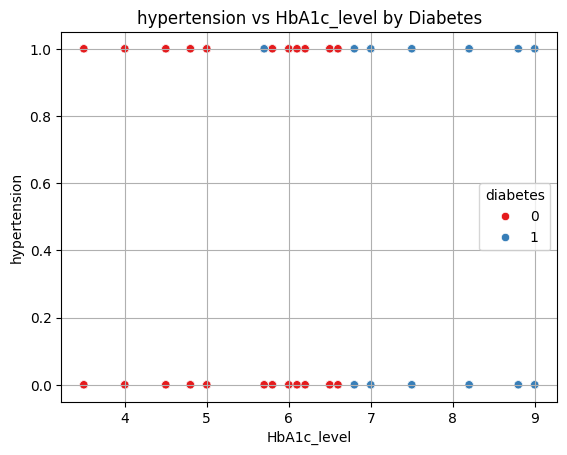

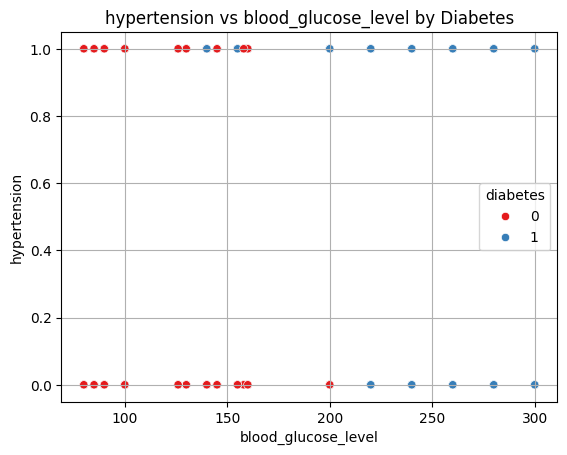

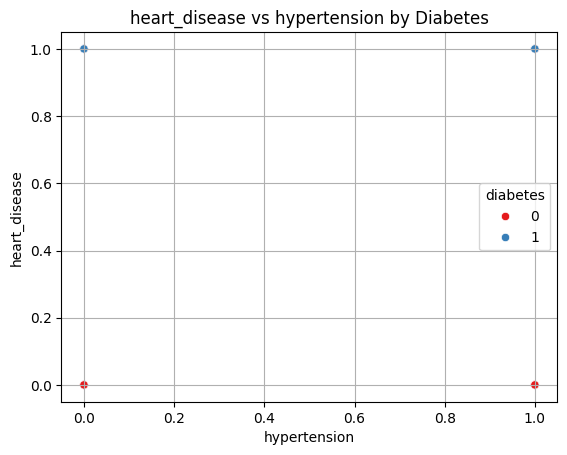

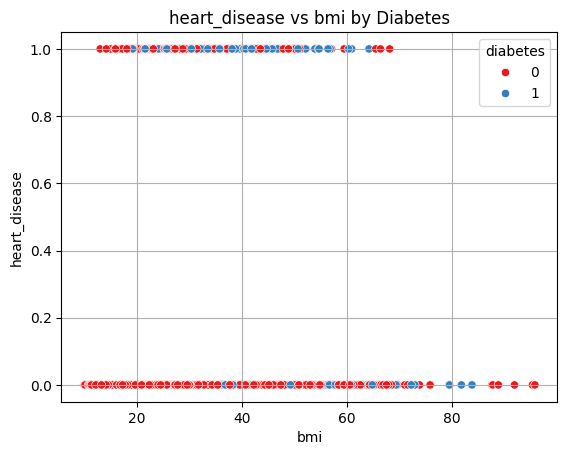

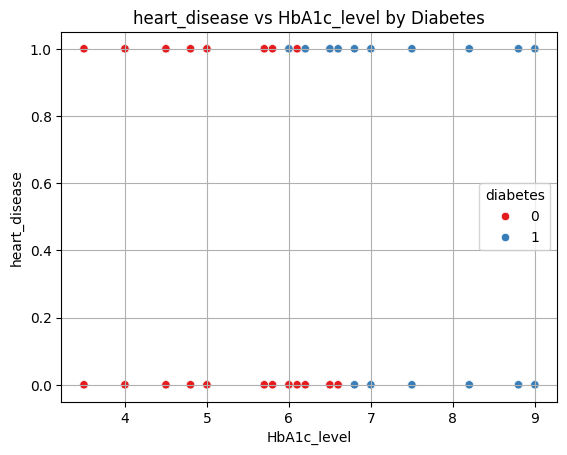

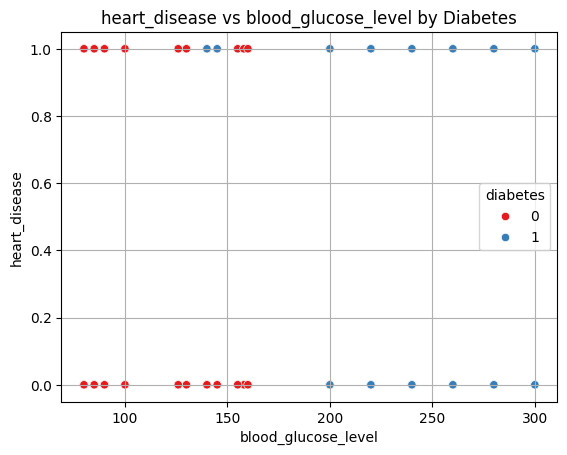

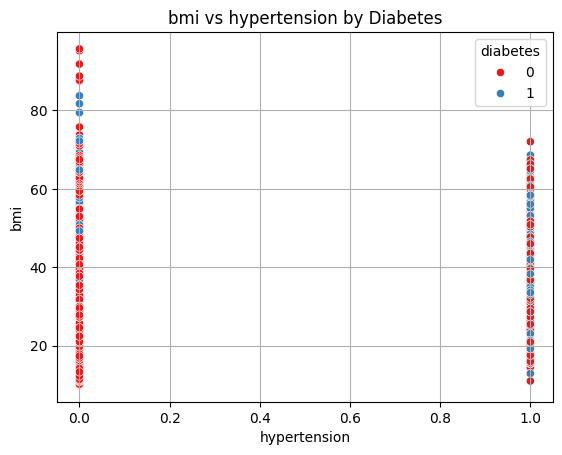

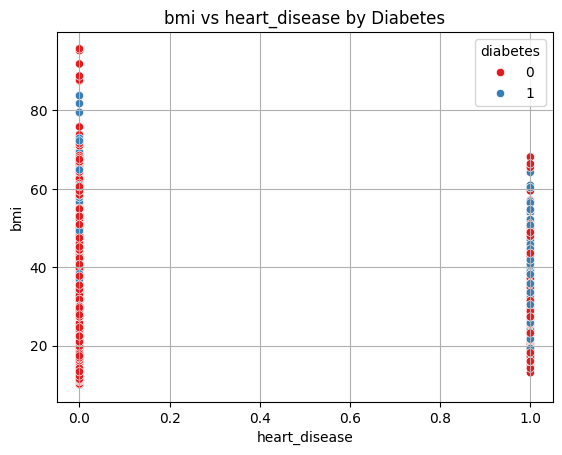

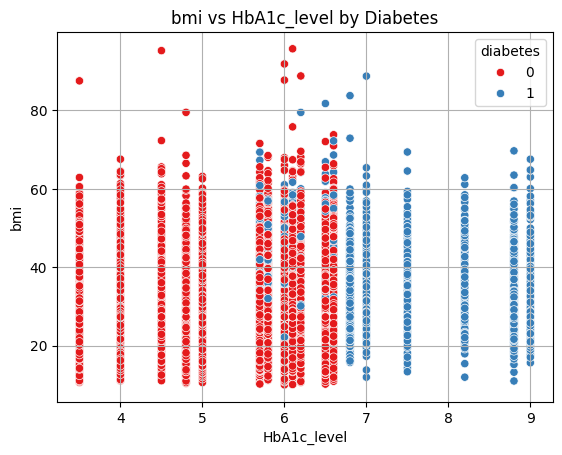

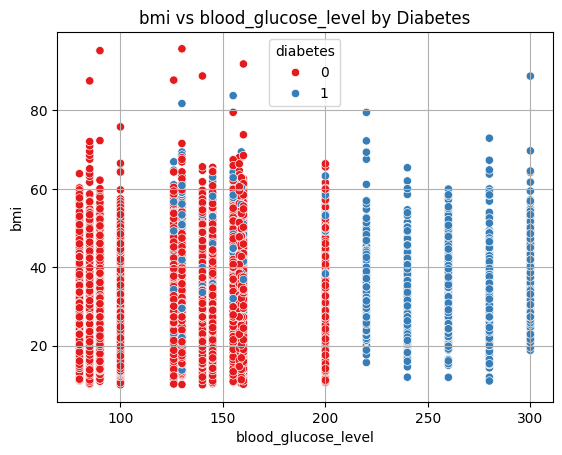

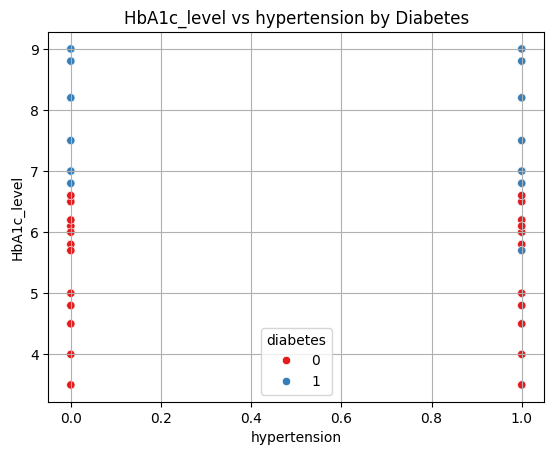

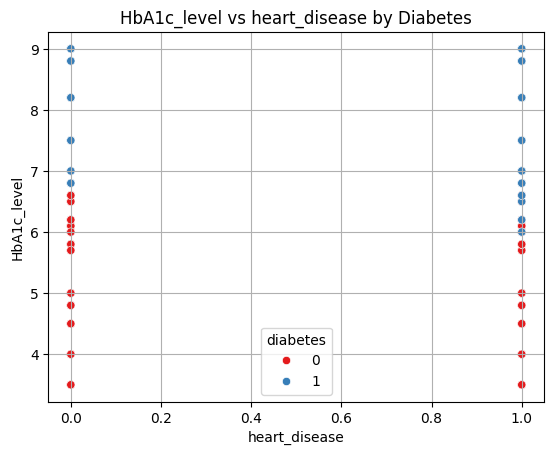

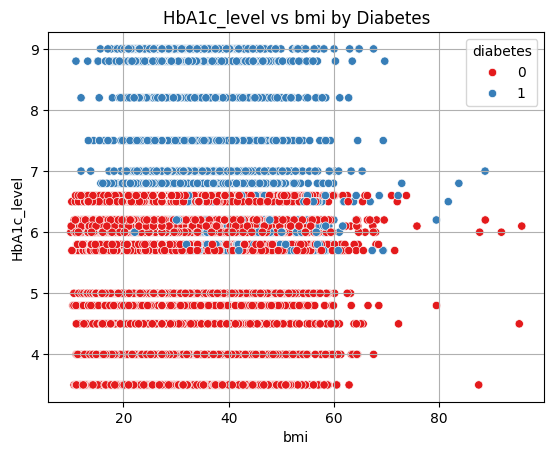

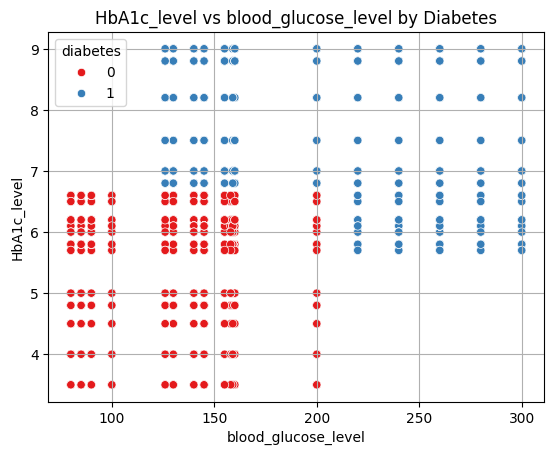

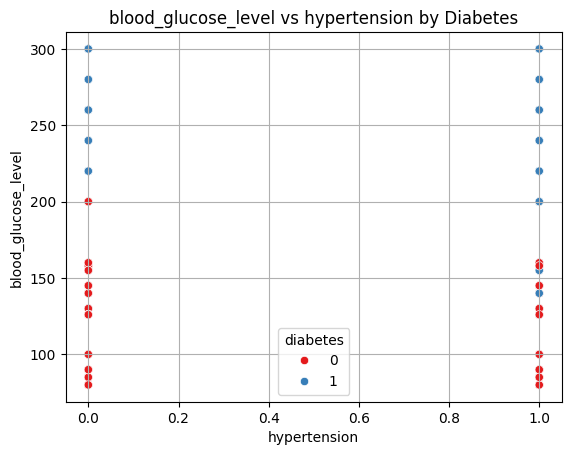

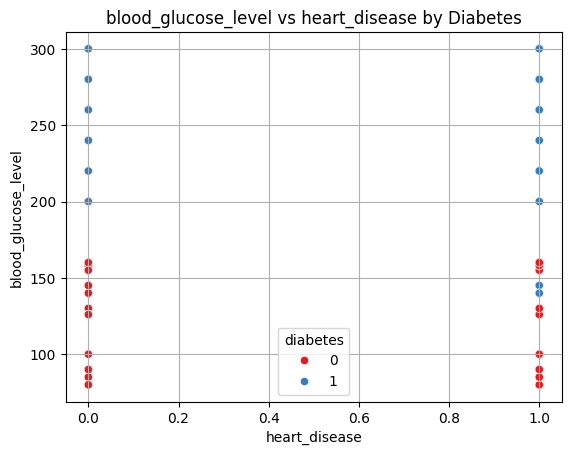

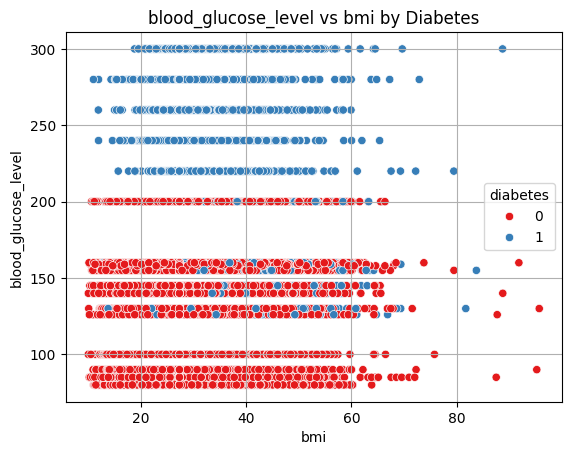

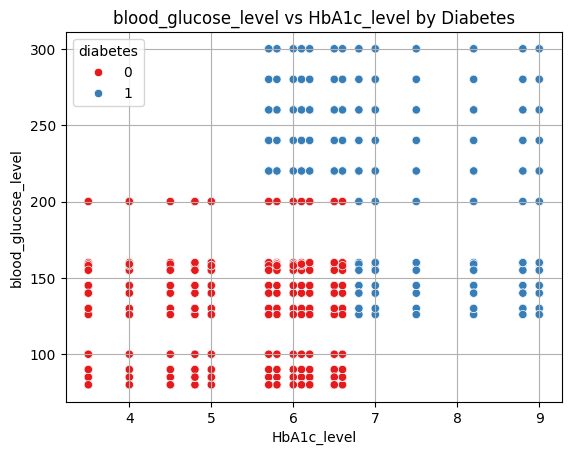

In [9]:
features = ['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(5, 3))
for cols in df.columns[:-1]:
    for feature in features:
        if feature != cols:
            sns.scatterplot(data=df, x=feature, y=cols, hue='diabetes', palette='Set1')
            plt.title(f'{cols} vs {feature} by Diabetes')
            plt.xlabel(feature)
            plt.ylabel(cols)
            plt.grid(True)
            plt.show()

# MODEL Preprocessing
- We select 'Glucose', 'BMI', 'Age' and predict 'Outcome'

In [10]:
# Selecting features and Targets
X = df[['hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

# Splitting into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features for Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL TRAINING AND EVALUATION
- Train using Logistic Regression Model first
- Analysing the model:
    1) Accuracy: Percentage of correct predictions out of all
    2) Confusion Matrix: Predicted vs Actual
    3) Classification Report: Gives Preecision, Recall, F1-score for each class
    - (High Recall is import for class 1 - catch as many diabetic cases as possible)
    - (F1-score balances precision and recall)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()

# Train the model and Predict on the data
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Confusion Matric:\n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 95.94%
Confusion Matric:
 [[18186   106]
 [  707  1001]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.90      0.59      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.79      0.84     20000
weighted avg       0.96      0.96      0.96     20000



In [12]:
# Saving LR model for future comparison
import joblib
joblib.dump(model,"logistic_model.pkl")

['logistic_model.pkl']

## Hyperparameter Tuning
- For better model results - manually configuring settings before training the model
- We use C: for inverse of regularization
- penalty : L1,L2 for feature elimination or reduce value of coefficients
- Solver  : Optimizing model performance by minimizing loss function (we use liblinear, newton-cg)
- Verbose : to display detailed logs and process information (Verbose = 1: basic information)
- n-jobs  : specifies no. of cpu cores to use (-1: all available CPU cores)

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty':['l1','l2'],                 # Type of Regularization
    'C' : [0.01, 0.1, 1, 10, 100],          # Regularization strength (smaller = stronger regularization)
    'solver': ['liblinear', 'newton-cg'],   # For minimizing loss function by finding best-fit param
    'max_iter'  : [100,1000,2500,5000]
}]

# Create the model
log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           scoring='f1',          # Focus on improving diabetic (class 1) prediction
                           cv=5,                  # 5-fold cross-validation
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)
print(f"Best Estimator: {grid_search.best_estimator_}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Estimator: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.7121426749446884
Accuracy: 0.95945
Confusion Matrix:
 [[18184   108]
 [  703  1005]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.90      0.59      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# TRAINING SVM MODEL
- We use SVM (Support Vector Machine) with RBF Kernel (since relationship is non linear)

In [14]:
from sklearn.svm import SVC

# Step 1: Create and train SVM with linear kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # C controls regularization, try 0.1, 1, 10
svm_model.fit(X_train_scaled, y_train)

# Step 2: Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 3: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.96435
Confusion Matrix:
 [[18284     8]
 [  705  1003]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.99      0.59      0.74      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.79      0.86     20000
weighted avg       0.97      0.96      0.96     20000



In [15]:
# saving the model
joblib.dump(svm_model,"svm_model.pkl")

['svm_model.pkl']

# RANDOM FOREST MODEL
- Handles non-linearity better than
- more robust to outliers
- Automatically selects important features

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in forest
    max_depth=None,         # Let trees grow until all leaves are pure
    random_state=42,
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.96285
Confusion Matrix:
 [[18062   230]
 [  513  1195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.84      0.70      0.76      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.84      0.87     20000
weighted avg       0.96      0.96      0.96     20000



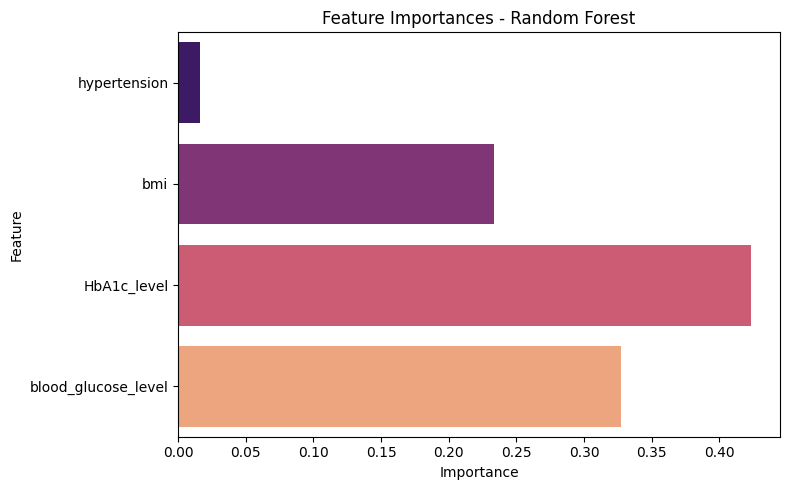

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette='magma')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## HYPERPARAMETER TUNING FOR RF MODEL

In [19]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.97215
Confusion Matrix:
 [[18290     2]
 [  555  1153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

